In [ ]:
''' PROJECT INTRODUCTION: Analyzing COVID-19's Impact on Facility Violations
    
    The COVID-19 pandemic has reverberated widely, leading to shifts in facility violations. 
    Our study aims to investigate the pandemic's impact on grocery stores and restaurants, 
    expecting increased violations in the former and decreased violations in the latter during 
    the pandemic when compared to before it. Furthermore, we anticipate that violation types will 
    vary based on the facility type and their association with nearby areas.

    We will conduct a thorough analysis employing diverse data visualization techniques 
    including bar charts, line charts, heat maps, and pie charts, alongside a deep dive into 
    violation types, considering factors like facility type, date, and location. 
    These visualizations will be made accessible through an interactive web portal, 
    along with our analyses of the data as a whole, allowing users to easily explore our findings.

    The utilization of machine learning models allows us to predict passing accuracies post-pandemic.
    To better suit these accuracies, we utilized a set date range occurring before the pandemic.
    This date range will be noted throughout the project.
'''


In [ ]:
''' EXPLORATORY DATA ANALYSIS
    
    We have sectioned our data analysis section by group members based on our individual graphs. 
    These reflections are from each person explaining their data visualizations and some conclusions drawn from them.

    Kiyoon Pie Chart: 
    There was a significant increase of the Physical and Clean violation types as indicated by our pie chart 
    visualization of violations during the pandemic, which corresponded to the facilities general cleanliness. 
    This may have been due to scrutiny of such violations being higher, perhaps due to a higher bar 
    being set for this type of violation. It is surprising though, as one might think that due to a 
    need for more cleanliness during this period, we would see less of this type of violation. 
    The rest of the violations remained the same for the most part.
 
    Sahil: 
    Something interesting that I observed in my graph was that grocery store violations increased during COVID, 
    while restaurant violations decreased. This finding caught my attention because another group member 
    had worked in a restaurant during COVID, and his personal experience would lead us to believe the opposite. 
    He mentioned that the rules in restaurants were much stricter. However, as we can see from the data, 
    restaurant violations actually decreased, which was surprising to me.

    Miguel:
    The objective of the heat map was to visually represent the prevalence of different violation types by 
    utilizing the geographical coordinates (latitude and longitude) of each facility type. 
    The interactive map allows users to zoom in and out on specific regions/locations, showcasing the 
    distribution of violations. Furthermore, the heat map’s ability to display concentrations of violations 
    rather than quantity allows for the investigation of patterns influenced by surrounding areas as described 
    in our hypothesis that specific areas may play a role in the prevalence of specific violation types. 
    Findings include zooming in on regions and understanding how this impacts surrounding areas.

    Arthur Pie Chart (Total Violations):
    To my surprise, the general pass/fail rate of the violations during the pandemic saw only a modest change. 
    The pass rate decreased by only 3.2%, and the fail rate only saw an increase of 0.9%. As might be expected, 
    the rate of a status of “Out of Business” during the pandemic increased by 1.1%, however this does not truly 
    reflect how many businesses actually went under during this time, as this data only relates to this status 
    during health inspections.

    Wasay Line Charts:
    One line chart represents the failed inspections during the pandemic, and another line chart represents the 
    failed inspections before the pandemic. The pandemic represents the time from 03/01/2020-05/11/2023. 
    The pre-pandemic represents the time from 10/01/2016-12/15/2019.
    Interestingly, during the pandemic, the number of violations are less compared to the before the pandemic 
    where the number of violations are more. A possible reason for this could be because a lot of facilities 
    got more strict in cleaning on the daily and having more inspections to ensure safety. 
    Additionally, another observation is that there were a lot of decreases and increases in the trend of violations 
    for both line charts. There could be a variety of reasons for that, possibly due to certain events going on around 
    those particular time periods. Overall, both of these line charts give a comparison of the trends of food violations 
    before and during the pandemic.  


'''

In [ ]:
''' HYPOTHESIS
    
    The COVID-19 pandemic has had a significant impact on the distribution and frequency of violations 
    across different facility types. Specifically, we expect to observe an increase in violations in grocery stores 
    and a decrease in violations in restaurants during the pandemic compared to pre-pandemic times. 
    Additionally, we hypothesize that the most common violation types identified will vary across different 
    facility types, and that surrounding areas may have an influence on the prevalence of certain violation types. 
'''

In [1]:
''' Import Data Libraries  
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium 
from folium.plugins import HeatMap

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import seaborn as sns

In [6]:
''' Data 

    Our data was limited to two different time periods: pre-pandemic and pandemic dates.
    The pre-pandemic date range:
            10/01/2016 to 12/15/2019
    Pandemic date range:
            03/01/2020 to 05/11/2023
    Why these dates?
        To begin with, the national public health emergency for the pandemic ended on May 11, 2023.
        To ensure the data was accurate and balanced, we ensured that the length of dates for the 
        pre-pandemic matched the dates length of the pandemic.
    Final Data:
        Our final data frame includes a combination of these two date ranges with focus on 
        inspection date and results. These are two critical columns moving forward with our 
        data analysis in comparing each date range.
'''

all_data = pd.read_csv("Food_Inspections.csv")
col_data = all_data.loc[:, ["Results", "Inspection Date"]]
col_data.loc[:, 'Inspection Date'] = pd.to_datetime(col_data['Inspection Date'], format='%m/%d/%Y')

start_date_pand = pd.to_datetime('03/01/2020', format='%m/%d/%Y')
end_date_pand = pd.to_datetime('05/11/2023', format='%m/%d/%Y')

pand_data = col_data.loc[(col_data['Inspection Date'] >= start_date_pand) & (col_data['Inspection Date'] <= end_date_pand)]

start_date_pre = pd.to_datetime('10/01/2016', format='%m/%d/%Y')
end_date_pre = pd.to_datetime('12/15/2019', format='%m/%d/%Y')

pre_data = col_data.loc[(col_data['Inspection Date'] >= start_date_pre) & (col_data['Inspection Date'] <= end_date_pre)]
pre_data

C:\Users\Mike's PC\AppData\Local\Temp\ipykernel_49484\449276002.py:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  col_data.loc[:, 'Inspection Date'] = pd.to_datetime(col_data['Inspection Date'], format='%m/%d/%Y')


Results Inspection Date
63776   Pass w/ Conditions      2019-12-13
63777                 Pass      2019-12-13
63778                 Pass      2019-12-13
63779   Pass w/ Conditions      2019-12-13
63780                 Pass      2019-12-13
...                    ...             ...
126264                Pass      2016-10-04
126265                Pass      2016-10-03
126266     Out of Business      2016-10-03
126267     Out of Business      2016-10-03
126268                Pass      2016-10-03

[62493 rows x 2 columns]

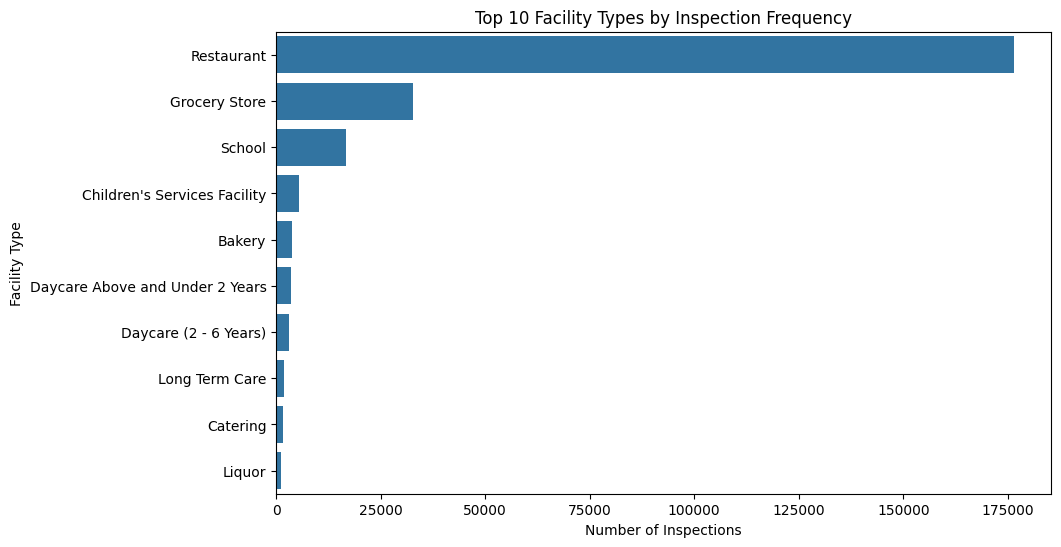

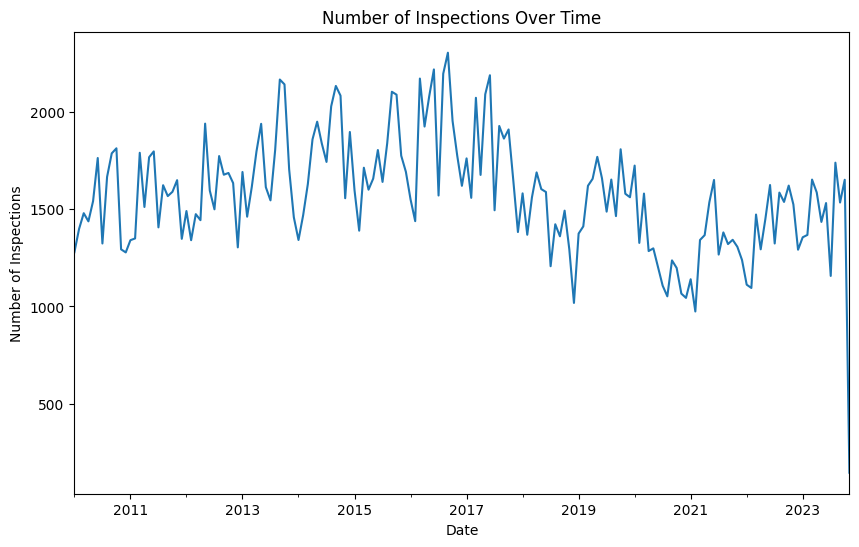

In [2]:
'''  Visualizations 1 + 2 By Kiyoon

    Why restaurants/grocery stores and why during the pandemic?
    The hypothesis highlighted restaurants and grocery stores as the primary areas of interest, 
    a choice supported by the collective data found in Visual 1 (bar chart) and Visual 2 (line chart).
    Visual 1 illustrates the large number of violations in both restuarants and grocery stores
    compared to the other types of facilities. Additionally, Visual 2 reveals a noticable decline 
    in the number of inspections occurring between 2020 and 2023, aligning with the investigation
    time period of the pandemic noted in the Data section.
'''
# All data in Food_Inspections will be used.
df = pd.read_csv('Food_Inspections.csv')

# Distribution of Facility Types
plt.figure(figsize=(10, 6))
facility_counts = df['Facility Type'].value_counts().head(10)
sns.barplot(x=facility_counts, y=facility_counts.index)
plt.title('Top 10 Facility Types by Inspection Frequency')
plt.xlabel('Number of Inspections')
plt.ylabel('Facility Type')
plt.show()

# Timeline of Inspections
plt.figure(figsize=(10, 6))
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df.set_index('Inspection Date', inplace=True)
df.resample('M').size().plot()
plt.title('Number of Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Inspections')
plt.show()



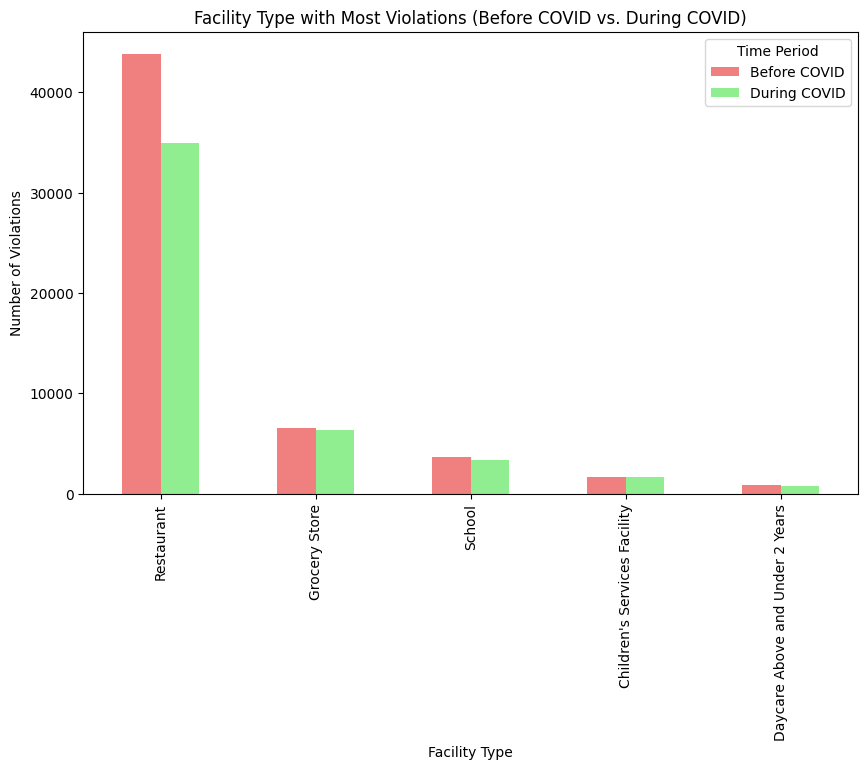

In [3]:
''' VISUALIZATION 3 by Sahil
    
    Expanding on the previous visualizations, the bar chart presents the large number 
    of violations observed during and before the pandemic in both restaurants and 
    grocery stores, providing additional support for the inital hypothesis. Furthermore, 
    a trend emerges as restaurants experienced a consierable decrease in violations during the
    pandemic, contrasting with grocery stores that saw a marginal decrease.
'''
df = pd.read_csv('Food_Inspections.csv')
start_date_pand = pd.to_datetime('03/01/2020', format='%m/%d/%Y')
end_date_pand = pd.to_datetime('05/11/2023', format='%m/%d/%Y')
start_date_pre = pd.to_datetime('10/01/2016', format='%m/%d/%Y')
end_date_pre = pd.to_datetime('12/15/2019', format='%m/%d/%Y')

df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
def categorize_time_period(date):
    if start_date_pre <= date <= end_date_pre:
        return 'Before COVID'
    elif start_date_pand <= date <= end_date_pand:
        return 'During COVID'

df['Time Period'] = df['Inspection Date'].apply(categorize_time_period)
grouped = df.groupby(['Facility Type', 'Time Period']).size().unstack(fill_value=0)
N = 5
top_facilities = grouped.sum(axis=1).nlargest(N)


colors = ['lightcoral', 'lightgreen']
ax = grouped.loc[top_facilities.index].plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Facility Type with Most Violations (Before COVID vs. During COVID)')
plt.xlabel('Facility Type')
plt.ylabel('Number of Violations')

plt.legend(title='Time Period', labels=['Before COVID', 'During COVID'])
plt.show()

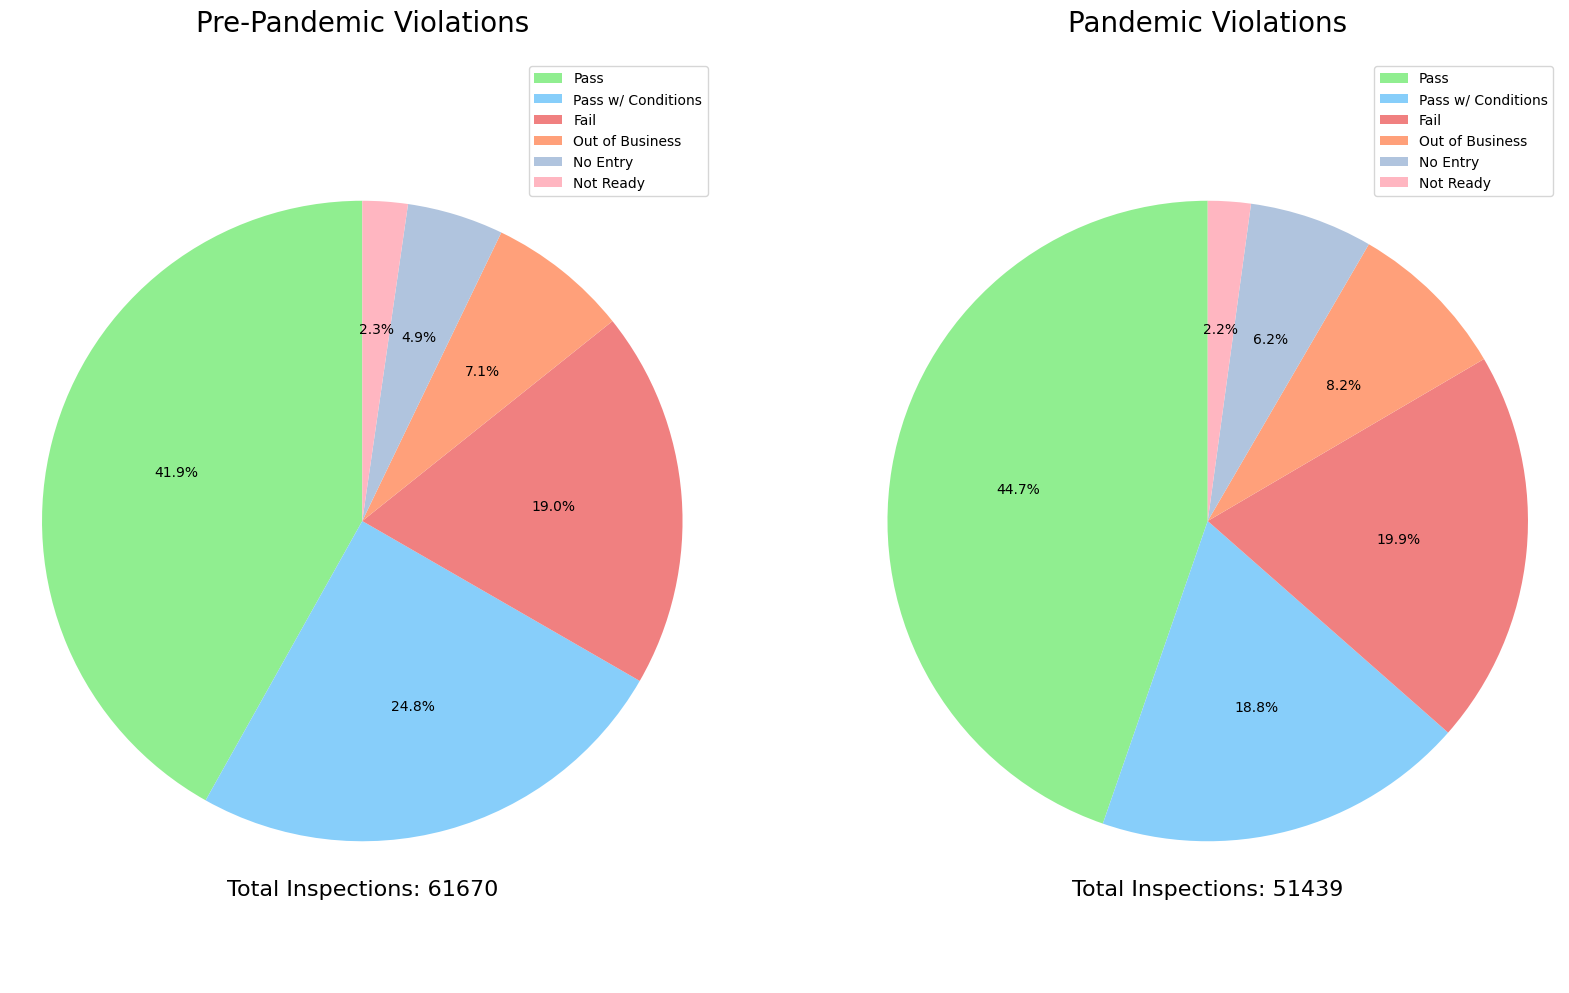

In [7]:
''' VISUALIZATION 4 By Arthur
    
    The hypothesis noted that the pandemic would influence the frequecny of violations across
    various facility types. The following pie charts depict a reduction in the number of violations
    during the pandemic (Pie Chart on right) in contrast to the pre-pandemic period (pie chart on left).
'''
pand_counts = pand_data['Results'].value_counts()
result_list1 = pand_counts.reset_index().values.tolist()

pre_counts = pre_data['Results'].value_counts()
result_list2 = pre_counts.reset_index().values.tolist()

pand_nums = [['Pass', 22988], ['Pass w/ Conditions', 9682], ['Fail', 10251], ['Out of Business', 4202], ['No Entry', 3205], ['Not Ready', 1111]]
pre_nums = [['Pass', 26158], ['Pass w/ Conditions', 15503], ['Fail', 11902], ['Out of Business', 4451], ['No Entry', 3039], ['Not Ready', 1427]]


colors = ['lightgreen', 'lightskyblue', 'lightcoral', 'lightsalmon', 'lightsteelblue', 'lightpink']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# Pre-Pandemic Violations)
wedges1, texts1, autotexts1 = ax1.pie([item[1] for item in pre_nums], autopct='%1.1f%%', startangle=90, colors=colors)
# (Pandemic Violations)
wedges2, texts2, autotexts2 = ax2.pie([item[1] for item in pand_nums], autopct='%1.1f%%', startangle=90, colors=colors)

ax1.legend([item[0] for item in pre_nums], loc='best')
ax2.legend([item[0] for item in pand_nums], loc='best')

total_pandemic_inspections = 51439
total_pre_inspections = 61670

ax1.text(0, -1.15, f'Total Inspections: {total_pre_inspections}', ha='center', va='center', fontsize=16)
ax2.text(0, -1.15, f'Total Inspections: {total_pandemic_inspections}', ha='center', va='center', fontsize=16)
ax1.set_title('Pre-Pandemic Violations', fontsize=20, pad=20)
ax2.set_title('Pandemic Violations', fontsize=20, pad=20)

ax1.axis('equal')
ax2.axis('equal')

plt.show()

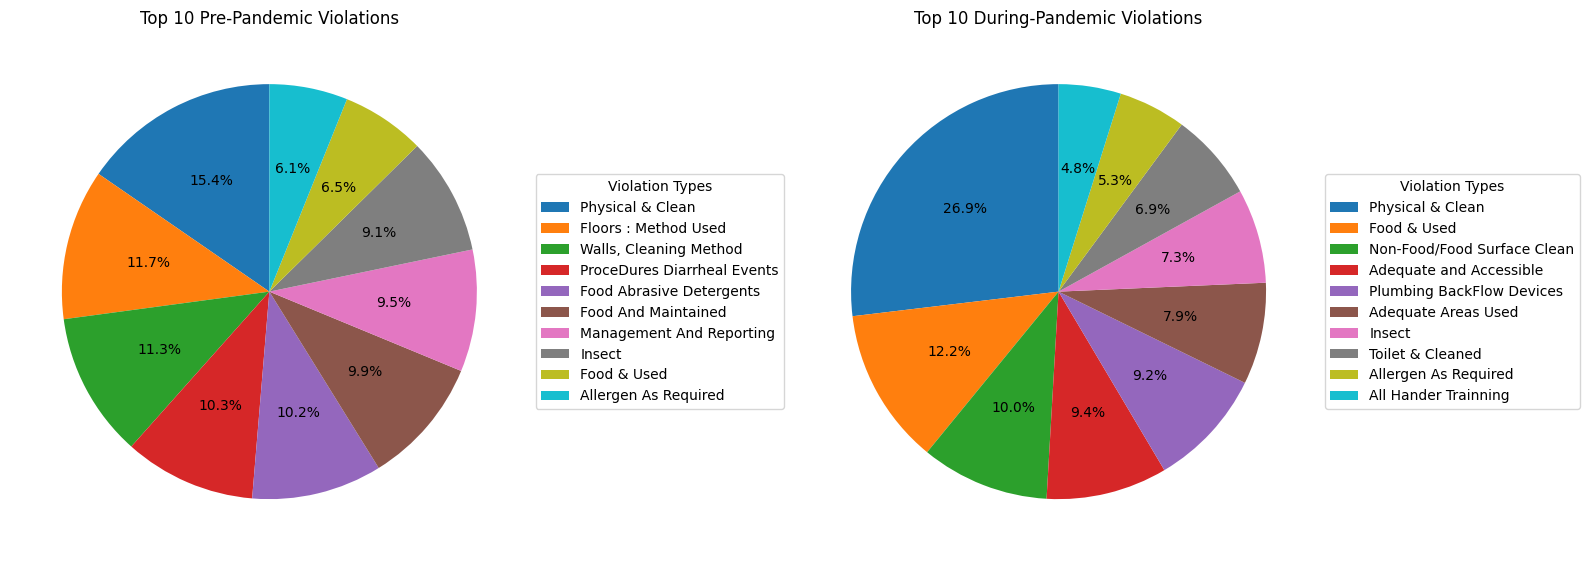

In [8]:
''' VISUALIZATION 5 by Kiyoon

    This data visualization showcases the top 10 most common violation types during both 
    before and during the pandemic. The findings suggest that there was a transition
    of facility related violations from before the pandemic to during the pandemic. 
    Because of several restaurants limited to take out, violations of facilites occurred 
    less often and saw an increase in violations related to sanitation and hygiene.
    This observation is related to the hypothesis, as fewer violations occurring
    in restaurants during the pandemic can be attibuted to reduced emphasis on 
    facility related issues due to restrictions on public access during the pandemic.
'''
violations_data =pd.read_csv('Food_Inspections.csv')

pd.set_option('display.max_columns', None)
violations_data.head(262680)

violations_data['Inspection Date'] = pd.to_datetime(violations_data['Inspection Date'])


start_date_pre = pd.to_datetime('10/01/2016', format='%m/%d/%Y')
end_date_pre = pd.to_datetime('12/15/2019', format='%m/%d/%Y')
start_date_pand = pd.to_datetime('03/01/2020', format='%m/%d/%Y')
end_date_pand = pd.to_datetime('05/11/2023', format='%m/%d/%Y')

def extract_violations(violations):
    if pd.isnull(violations):
        return []
    return [violation.split(' - ')[0] for violation in violations.split(' | ')]


violations_data['Violation Types'] = violations_data['Violations'].apply(extract_violations)
violations_data_exploded = violations_data.explode('Violation Types')
pre_pandemic_data = violations_data_exploded[(violations_data_exploded['Inspection Date'] >= start_date_pre) & (violations_data_exploded['Inspection Date'] <= end_date_pre)]
during_pandemic_data = violations_data_exploded[(violations_data_exploded['Inspection Date'] >= start_date_pand) & (violations_data_exploded['Inspection Date'] <= end_date_pand)]
top_pre_violations = pre_pandemic_data['Violation Types'].value_counts().head(10)
top_during_violations = during_pandemic_data['Violation Types'].value_counts().head(10)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))


custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

custom_legend_labels_pre = ['Physical & Clean', 'Floors : Method Used', 'Walls, Cleaning Method', 'ProceDures Diarrheal Events', 'Food Abrasive Detergents',
                            'Food And Maintained', 'Management And Reporting', 'Insect', 'Food & Used', 'Allergen As Required']

custom_legend_labels_during = ['Physical & Clean', 'Food & Used', 'Non-Food/Food Surface Clean', 'Adequate and Accessible', 'Plumbing BackFlow Devices',
                               'Adequate Areas Used', 'Insect', 'Toilet & Cleaned', 'Allergen As Required', 'All Hander Trainning']


axes[0].pie(top_pre_violations, autopct='%1.1f%%', startangle=90, colors=custom_colors)
axes[0].set_title('Top 10 Pre-Pandemic Violations')


axes[1].pie(top_during_violations, autopct='%1.1f%%', startangle=90, colors=custom_colors)
axes[1].set_title('Top 10 During-Pandemic Violations')


axes[0].legend(custom_legend_labels_pre, title="Violation Types", loc="center left", bbox_to_anchor=(1, 0.5))
axes[1].legend(custom_legend_labels_during, title="Violation Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()


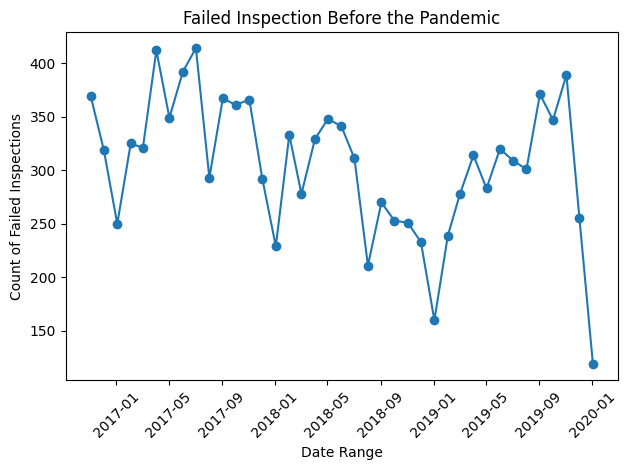

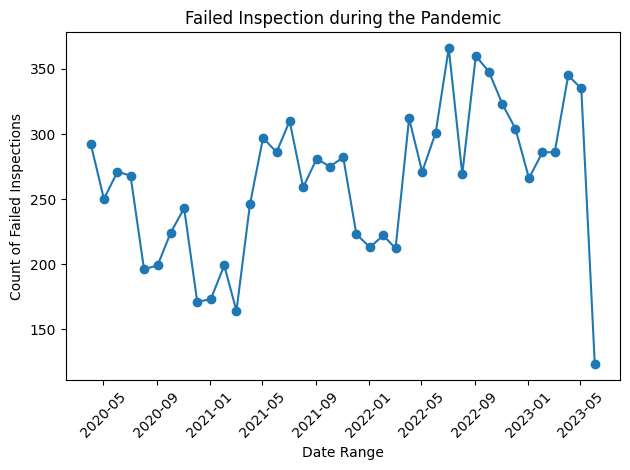

In [9]:
''' VISUALIZATION 6 by Wasay
      The visualization below proves that during the pandemic, the number of violations 
      are less compared to the before the pandemic where the number of violations are more. 
      A possible reason for this could be because a lot of facilities got more strict in cleaning 
      on the daily and having more inspections to ensure safety. Additionally, another 
      observation is that there were a lot of decreases and increases in the trend of violations 
      for both line charts. There could be a variety of reasons for that, possibly due to 
      certain events going on around those particular time periods. Overall, both of these line 
      charts give a comparison of the trends of food violations before and during the pandemic.
'''
df = pd.read_csv('Food_Inspections.csv')
pd.set_option('display.max_columns', 22)


# Graph: Pre-Pandemic
df_pre_pand = df[df['Results']=='Fail'].copy()
df_pre_pand['Inspection Date'] = pd.to_datetime(df_pre_pand['Inspection Date'], format='%m/%d/%Y')
start_date_pre = '2016-10-01'
end_date_pre = '2019-12-15'
df_pre_pand = df_pre_pand[(df_pre_pand['Inspection Date'] >= start_date_pre) & (df_pre_pand['Inspection Date'] <= end_date_pre)]
df_pre_pand = df_pre_pand.sort_values('Inspection Date')
date_counts = df_pre_pand['Inspection Date'].value_counts()

date_counts_sorted = date_counts.sort_index()
date_counts_sorted.index = pd.to_datetime(date_counts_sorted.index)
date_ranges = date_counts_sorted.resample('1M').sum().index
counts_by_date_range = date_counts_sorted.resample('1M').sum()
date_range_midpoints = date_ranges + pd.DateOffset(days=3)

plt.plot(date_range_midpoints, counts_by_date_range.values, marker='o')
plt.title('Failed Inspection Before the Pandemic')
plt.xlabel('Date Range')
plt.ylabel('Count of Failed Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Graph: Pandemic
df_with_fails = df[df['Results']=='Fail'].copy()
df_with_fails['Inspection Date'] = pd.to_datetime(df_with_fails['Inspection Date'], format='%m/%d/%Y')
start_date_pand = '2020-03-01'
end_date_pand = '2023-05-11'
df_with_fails = df_with_fails[(df_with_fails['Inspection Date'] >= start_date_pand) & (df_with_fails['Inspection Date'] <= end_date_pand)]
df_with_fails = df_with_fails.sort_values('Inspection Date')

date_counts = df_with_fails['Inspection Date'].value_counts()
date_counts_sorted = date_counts.sort_index()
date_counts_sorted.index = pd.to_datetime(date_counts_sorted.index)
date_ranges = date_counts_sorted.resample('1M').sum().index
counts_by_date_range = date_counts_sorted.resample('1M').sum()
date_range_midpoints = date_ranges + pd.DateOffset(days=3)

plt.plot(date_range_midpoints, counts_by_date_range.values, marker='o')
plt.title('Failed Inspection during the Pandemic')
plt.xlabel('Date Range')
plt.ylabel('Count of Failed Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

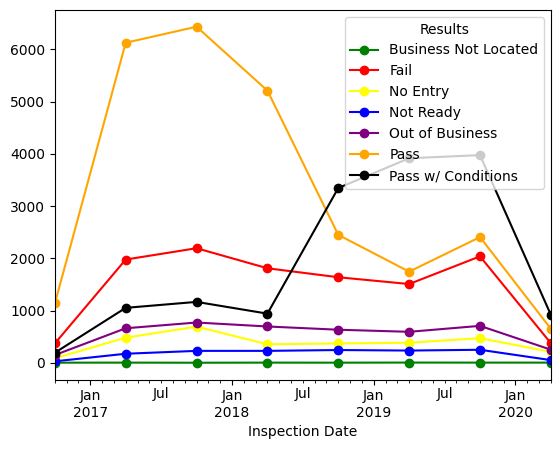

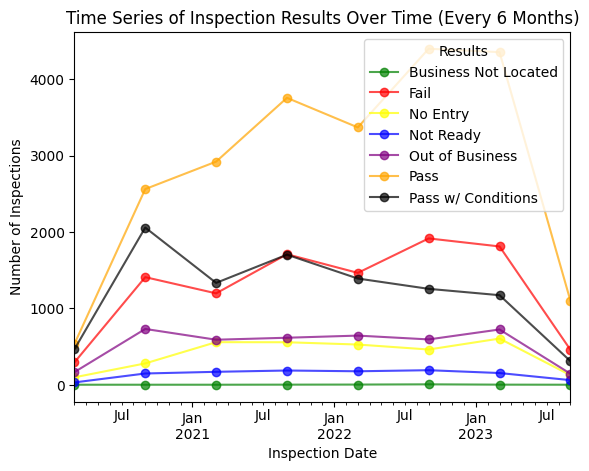

In [10]:
''' VISUALIZATION 7 by Sahil
      Diving deeper into the preceding visualizations (Visual 6), we can pinpoint the 
      distinct inspection outcomes in contrast to those instances marked as failures. 
      Notably, each category of inspection result exhibits a comparable linear trend, 
      mirroring the pattern observed in Visual 6, where instances of failed inspections 
      were documented. Between 2020 and early 2023 a decline in inspection results can be noted. 
'''
df = pd.read_csv('Food_Inspections.csv')
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

pre_pandemic_start = '2016-10-01'
pre_pandemic_end = '2019-12-15'
pandemic_start = '2020-03-01'
pandemic_end = '2023-05-11'


pre_pandemic_data = df[(df['Inspection Date'] >= pre_pandemic_start) & (df['Inspection Date'] <= pre_pandemic_end)]
pandemic_data = df[(df['Inspection Date'] >= pandemic_start) & (df['Inspection Date'] <= pandemic_end)]
pre_pandemic_results = pre_pandemic_data.groupby(pd.Grouper(key='Inspection Date', freq='6M'))['Results'].value_counts().unstack().fillna(0)
pandemic_results = pandemic_data.groupby(pd.Grouper(key='Inspection Date', freq='6M'))['Results'].value_counts().unstack().fillna(0)

plt.figure(figsize=(15, 10))
pre_pandemic_results.plot.line(marker='o', linestyle='-', color=['green', 'red', 'yellow', 'blue','purple', 'orange','black'], label='Pre-Pandemic')
pandemic_results.plot.line(marker='o', linestyle='-', color=['green', 'red', 'yellow','blue','purple', 'orange','black'], label='During Pandemic', alpha=0.7)
plt.title('Time Series of Inspection Results Over Time (Every 6 Months)')
plt.xlabel('Inspection Date')
plt.ylabel('Number of Inspections')
plt.legend(title='Results')
plt.show()

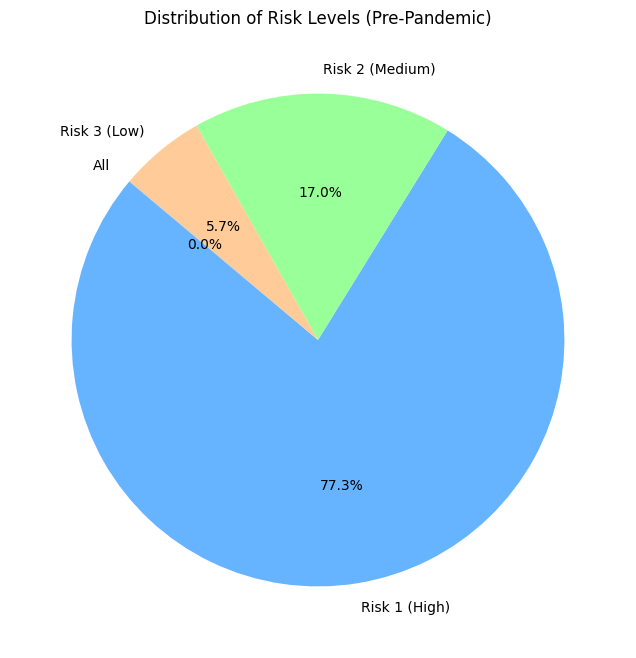

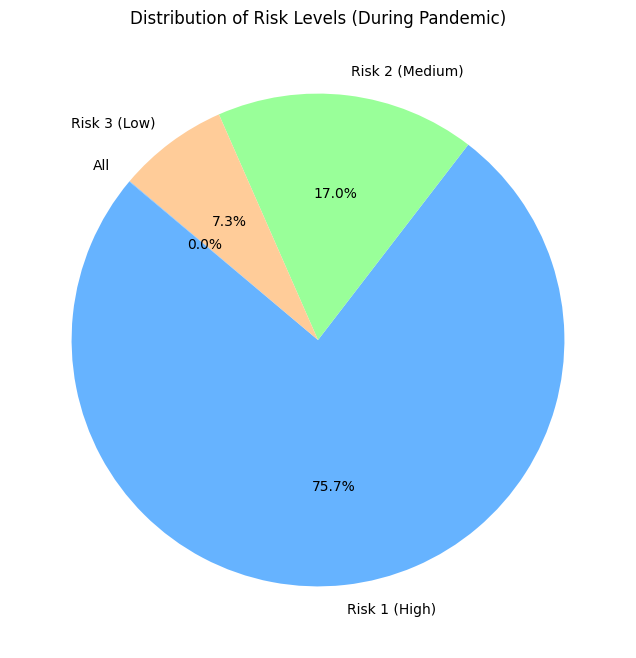

In [11]:
''' VISUALIZATION 8 by Arthur
      Facilities are categorized into Risk levels 1, 2, or 3, with a prevalent tendency 
      for the majority to fall into the risk level 1 category, often associated with violations 
      related to food safety and facility cleanliness. These findings highlight a 2% decrease 
      in level 1 risks, indicating a reduction in violations as indicated in Visual 4. 
'''

df = pd.read_csv('Food_Inspections.csv')

df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

pre_pandemic_start = '2016-10-01'
pre_pandemic_end = '2019-12-15'
pandemic_start = '2020-03-01'
pandemic_end = '2023-05-11'

pre_pandemic_data = df[(df['Inspection Date'] >= pre_pandemic_start) & (df['Inspection Date'] <= pre_pandemic_end)]
pandemic_data = df[(df['Inspection Date'] >= pandemic_start) & (df['Inspection Date'] <= pandemic_end)]

def plot_pie(data, title):
    plt.figure(figsize=(8, 8))
    risk_data = data['Risk'].value_counts()
    plt.pie(risk_data, labels=risk_data.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#99ff99', '#ffcc99'])
    plt.title(title)

plot_pie(pre_pandemic_data, 'Distribution of Risk Levels (Pre-Pandemic)')
plt.show()

plot_pie(pandemic_data, 'Distribution of Risk Levels (During Pandemic)')
plt.show()


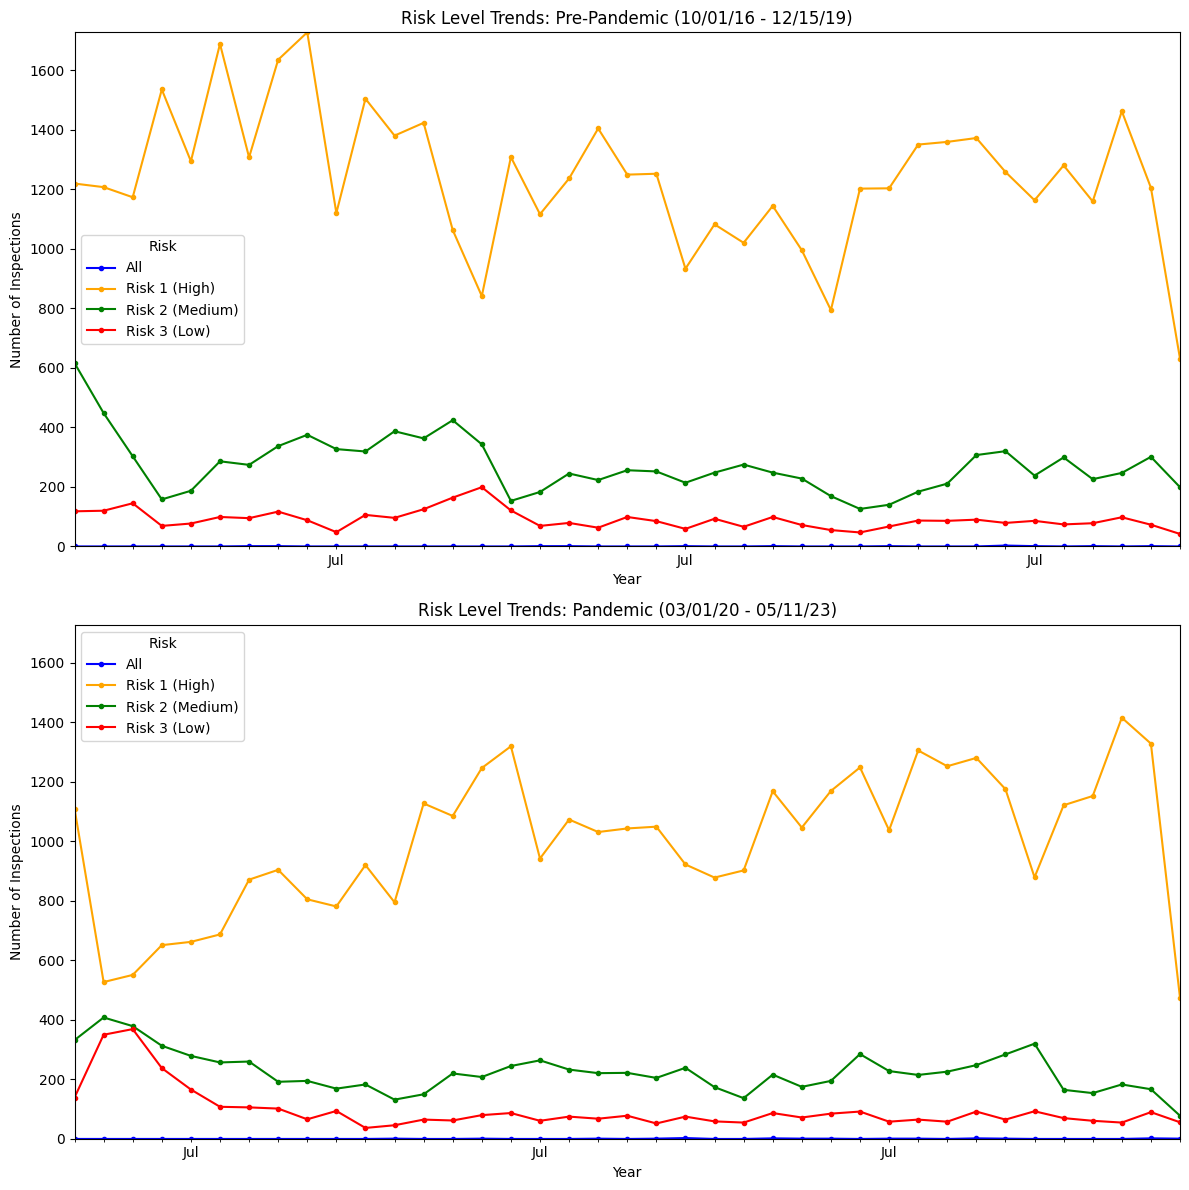

In [12]:
''' VISUALIZATION 9 by Wasay
      Expanding on the insights from Visual 8, we can note trends in risk levels. 
      Specifically, it becomes evident that the overall risk levels did decrease during 
      the pandemic, aligning with the observed decline in violations illustrated in Visual 4.
'''
import matplotlib.dates as mdates
data = pd.read_csv('Food_Inspections.csv')
data['Inspection Date'] = pd.to_datetime(data['Inspection Date'])

pre_pandemic_start, pre_pandemic_end = '2016-10-01', '2019-12-15'
pandemic_start, pandemic_end = '2020-03-01', '2023-05-11'

pre_pandemic_data = data[(data['Inspection Date'] >= pre_pandemic_start) & 
                         (data['Inspection Date'] <= pre_pandemic_end)].copy()
pandemic_data = data[(data['Inspection Date'] >= pandemic_start) & 
                     (data['Inspection Date'] <= pandemic_end)].copy()

pre_pandemic_data['YearMonth'] = pre_pandemic_data['Inspection Date'].dt.to_period('M')
pandemic_data['YearMonth'] = pandemic_data['Inspection Date'].dt.to_period('M')

risk_counts_pre = pre_pandemic_data.groupby(['YearMonth', 'Risk']).size().unstack().fillna(0)
risk_counts_pandemic = pandemic_data.groupby(['YearMonth', 'Risk']).size().unstack().fillna(0)

max_inspection_count = max(risk_counts_pre.max().max(), risk_counts_pandemic.max().max())

colors = ['blue', 'orange', 'green', 'red']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

risk_counts_pre.plot(ax=axes[0], color=colors, style='.-')
axes[0].set_title('Risk Level Trends: Pre-Pandemic (10/01/16 - 12/15/19)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Inspections')
axes[0].set_ylim(0, max_inspection_count)  # Synchronizing y-axis scale
axes[0].xaxis.set_major_locator(mdates.YearLocator())
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].tick_params(axis='x', rotation=0)

risk_counts_pandemic.plot(ax=axes[1], color=colors, style='.-')
axes[1].set_title('Risk Level Trends: Pandemic (03/01/20 - 05/11/23)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Inspections')
axes[1].set_ylim(0, max_inspection_count)  
axes[1].xaxis.set_major_locator(mdates.YearLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

C:\Users\Mike's PC\AppData\Local\Temp\ipykernel_49484\3162413862.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_pre_pandemic_zip.index, y=top5_pre_pandemic_zip.values, palette='viridis')
C:\Users\Mike's PC\AppData\Local\Temp\ipykernel_49484\3162413862.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_pandemic_zip.index, y=top5_pandemic_zip.values, palette='viridis')


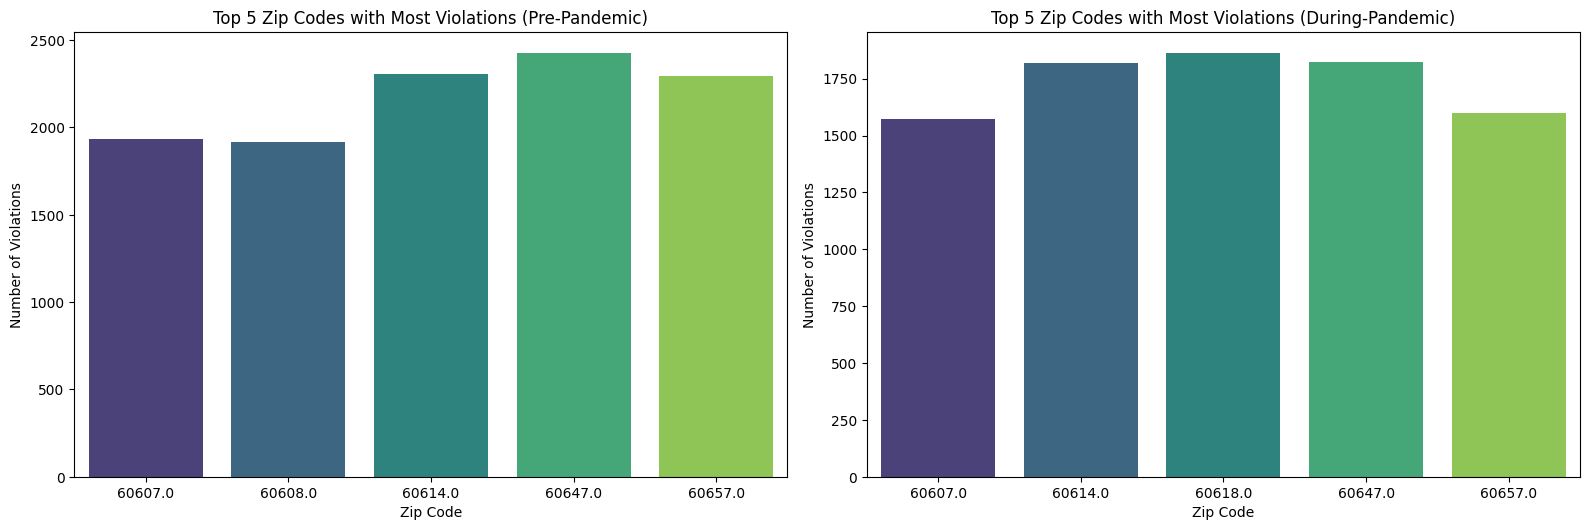

In [13]:
''' VISUALIZATION 10 by Miguel
      Examining the zip codes with the highest frequency of violations provides 
      valuable insights into the spatial dynamics that influence neighboring areas 
      and the prevalence of specific violation types. The presented bar chart serves 
      as a foundational step in our ongoing investigation, laying the groundwork for 
      the additional work deliverable in the report.
'''
df = pd.read_csv('Food_Inspections.csv')

df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])

pre_pandemic_start = '2016-10-01'
pre_pandemic_end = '2019-12-15'
pandemic_start = '2020-03-01'
pandemic_end = '2023-05-11'

pre_pandemic_data = df[(df['Inspection Date'] >= pre_pandemic_start) & (df['Inspection Date'] <= pre_pandemic_end)]
pandemic_data = df[(df['Inspection Date'] >= pandemic_start) & (df['Inspection Date'] <= pandemic_end)]

top5_pre_pandemic_zip = pre_pandemic_data['Zip'].value_counts().nlargest(5).sort_values(ascending=True)


top5_pandemic_zip = pandemic_data['Zip'].value_counts().nlargest(5).sort_values(ascending=True)


# Create bar plots for top 5 wards before and during the pandemic
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=top5_pre_pandemic_zip.index, y=top5_pre_pandemic_zip.values, palette='viridis')
plt.title('Top 5 Zip Codes with Most Violations (Pre-Pandemic)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Violations')


plt.subplot(2, 2, 2)
sns.barplot(x=top5_pandemic_zip.index, y=top5_pandemic_zip.values, palette='viridis')
plt.title('Top 5 Zip Codes with Most Violations (During-Pandemic)')
plt.xlabel('Zip Code')
plt.ylabel('Number of Violations')


plt.tight_layout()
plt.show()

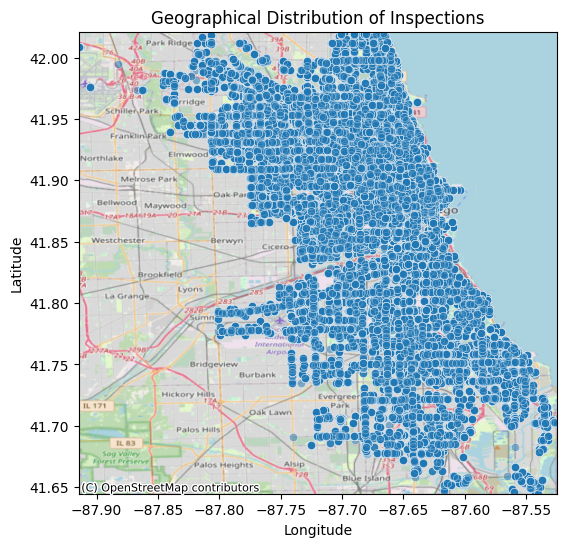

In [14]:
''' VISUALIZATION 11 by Kiyoon
      This is the distribution pattern of inspections occurring in Chicago, 
      further laying out the foundation for the additional work deliverable, 
      to further understand the influence of violations across surrounding areas.
'''
import contextily as ctx
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)

ax.set_xlim(df['Longitude'].min(), data['Longitude'].max())
ax.set_ylim(df['Latitude'].min(), data['Latitude'].max())

try:
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
except Exception as e:
    print(f"An error occurred: {e}")

plt.title('Geographical Distribution of Inspections')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
''' Machine Learning Analysis Introduction: 
    Hypothesis: 
        The COVID-19 pandemic has had a significant impact on the distribution and frequency of violations across different facility types. 
        Specifically, we expect to observe an increase in violations in grocery stores and a decrease in violations in restaurants during the pandemic compared to pre-pandemic times. 
        Additionally, we hypothesize that the most common violation types identified will vary across different facility types, and that 
        surrounding areas may have an influence on the prevalence of certain violation types. 

    We utilized five different machine learning analyses using a variety of models including the following:
        1)	Gradient Boosting Classifier
        2)	Random Forest Classifier
        3)	Logistic Regression Model 
        4)	Support Vector Machine (SVM)
        5)	Neural Network by Keras

    Our objective was to predict the results of each violation inspection based on six specific features, as they best reflect the hypothesis.
    The following features remained the same between each ML model: 
        1)	Risk
        2)	Facility Type
        3)	Zip Code
        4)	Inspection Type 
        5)	Violations
        6)	Location 

    We chose pre pandemic dates as our analysis as follows: 
            Start Date = 10-01-2016
            End Date = 12-15-2019
    Selecting data during the pandemic could negatively affect our outcome as various precautions in restuarants were taken to limit public contact. Thus violations would be impacted in addition
    to certain facilities not being 100% accessible.
'''

In [18]:
''' MajorityLabelClassifier baseline classifier: 
        Utilize the MLC baseline classifier that conducts a basic analysis of the
        majority label class that is equal to the mode of labels in data for all instances.
        This will serve as the baseline comparison for each of the five following classification
        models: 
            1)	HistGradientBoostingClassifier
            2)	Logistic Regression Model 
            3)	Random Forest Classifier
            4)	Support Vector Machine (SVM)
            5)	Neural Network by Keras.
        This allows us to evaluate each classification model to the basics of this majority baseline
        classification.
'''
from scipy.stats import mode
class MajorityClassClassifier():
    def __init__(self):
        self.mode = None

    def fit(self, X, y):
        y_binary = np.array([1 if label == 'Pass' else 0 for label in y])
        self.mode = mode(y_binary, axis=0, keepdims=True).mode.flatten()[0]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.array([self.mode])
        else:
            return np.full(X.shape[0], self.mode)
        
baselineClf = MajorityClassClassifier()
baselineClf.fit(X_train, y_train)
baseline_train = baselineClf.predict(X_train)
baseline_test = baselineClf.predict(X_test)

# Accuracy Score Results
accuracy = accuracy_score(y_train, baseline_train)
print(f'Training Accuracy: {accuracy:.2f}')


Training Accuracy: 0.58


In [17]:
''' ML Analysis 1: Gradient Boosting Classifier by Miguel

    Data Analysis/Explanations: 
        In line with the hypothesis, our specific data analyzed includes the following pre pandemic 
        dates as specified above:
            Start Date: 10-01-2016
            End Date: 12-15-2019
        This model relies on six specific features, the most important and in line with the
        hypothesis:
            1) Risk
            2) Facility Type
            3) Zip Code
            4) Inspection Type
            5) Violations
            6) Location
        The inspection date was changed to datetime status, allowing for numerical comparisons.
        This is an example of binary classification because 'Results' was classified as 1 for 'Pass'
        and otherwise, 0. Additionally, the data was split into training and testing for the classification
        report at the end of this model.
        The classification report showcases the accuracy along with precision, recall, and F1 for the 
        classifier. 
        The output from the classification report prints 1 for pass and 0 for otherwise. 
        Otherwise could be labeled as one of the following: 
            1) pass w/conditions
            2) fail
            3) out of business 
            4) no entry
            5) not ready

    Inferences Uncovered: 
        The classification report a high accuracy of 0.97, suggesting the model performed well.
        There were high scores for each of precision, recall, and F1. 
        The finds can conclude that this model is effective in predicting outcomes from the provided
        pre-pandemic dates. 
        In comparison to the baseline classifier accuracy of 0.58, this model performed incredibly well, 
        significanly outperforming the baseline classifier.
'''
df = pd.read_csv('Food_Inspections.csv')
start_date = '2016-10-01'
end_date = '2019-12-15'

df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_covid = df[(df['Inspection Date'] >= start_date) & (df['Inspection Date'] < end_date)]

selected_features = ['Risk', 'Facility Type', 'Zip', 'Inspection Type', 'Violations', 'Location']
target_variable = 'Results'
df_covid = df_covid[selected_features + [target_variable]].dropna()
label_encoder = LabelEncoder()

for column in ['Risk', 'Facility Type', 'Inspection Type', 'Violations', 'Location']:
    df_covid[column] = label_encoder.fit_transform(df_covid[column])

df_covid[target_variable] = df_covid[target_variable].apply(lambda x: 1 if x == 'Pass' else 0)

''' 
    Boosting Gradient Classification Report: 
'''
X_train, X_test, y_train, y_test = train_test_split(df_covid[selected_features], df_covid[target_variable], test_size=0.2, random_state=42)
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'HistGradientBoostingClassifier Accuracy: {accuracy:.2f}\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

HistGradientBoostingClassifier Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      5394
           1       0.96      0.97      0.97      3902

    accuracy                           0.97      9296
   macro avg       0.97      0.97      0.97      9296
weighted avg       0.97      0.97      0.97      9296



In [19]:
''' ML Analysis 2: Logistic Regression Model by Wasay
    Data Analysis/Explanations: 
        In line with the hypothesis, our specific data analyzed includes the following pre pandemic 
        dates as specified above:
            Start Date: 10-01-2016
            End Date: 12-15-2019
        This model relies on six specific features, the most important and in line with the
        hypothesis:
            1) Risk
            2) Facility Type
            3) Zip Code
            4) Inspection Type
            5) Violations
            6) Location
        The inspection date was changed to datetime status, allowing for numerical comparisons.
        This is an example of binary classification because 'Results' was classified as 1 for 'Pass'
        and otherwise, 0. Additionally, the data was split into training and testing for the classification
        report at the end of this model.
        Logistic Regression model requires the use of scalar feature to accuracly scale each input.
        The classification report showcases the accuracy along with precision, recall, and F1 for the 
        classifier. 
        The output from the classification report prints 1 for pass and 0 for otherwise. 
        Otherwise could be labeled as one of the following: 
            1) pass w/conditions
            2) fail
            3) out of business 
            4) no entry
            5) not ready

    Inferences Uncovered: 
        The accuracy score of 0.831 is an improvement over the baseline accuracy, however, still
        falling short of optimal performance. An optimal performance could be viewed as achieving 
        a 0.9 score of accuracy. This result prompts further investigation into alternate classification
        models.  
'''
df = pd.read_csv('Food_Inspections.csv')
start_date = '2016-10-01'
end_date = '2019-12-15'
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_covid = df[(df['Inspection Date'] >= start_date) & (df['Inspection Date'] < end_date)]


selected_features = ['Risk', 'Facility Type', 'Zip', 'Inspection Type', 'Violations', 'Location']
target_variable = 'Results'
df_covid = df_covid[selected_features + [target_variable]].dropna()


label_encoder = LabelEncoder()
for column in ['Risk', 'Facility Type', 'Inspection Type', 'Violations', 'Location']:
    df_covid[column] = label_encoder.fit_transform(df_covid[column])
df_covid[target_variable] = df_covid[target_variable].apply(lambda x: 1 if x == 'Pass' else 0)


X_train, X_test, y_train, y_test = train_test_split(df_covid[selected_features], df_covid[target_variable], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression(random_state=42, max_iter=2000, multi_class='multinomial', solver='saga')
clf.fit(X_train_scaled, y_train)
feature_importances = clf.coef_[0]
indices = np.argsort(np.abs(feature_importances))[::-1]


y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Logistic Regression Accuracy: 0.8310025817555938

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      5394
           1       0.80      0.79      0.80      3902

    accuracy                           0.83      9296
   macro avg       0.83      0.83      0.83      9296
weighted avg       0.83      0.83      0.83      9296



In [20]:
''' ML Analysis 3: Random Forest Classifier by Sahil
    Data Analysis/Explanations: 
        In line with the hypothesis, our specific data analyzed includes the following pre pandemic 
        dates as specified above:
            Start Date: 10-01-2016
            End Date: 12-15-2019
        This model relies on six specific features, the most important and in line with the
        hypothesis:
            1) Risk
            2) Facility Type
            3) Zip Code
            4) Inspection Type
            5) Violations
            6) Location
        The inspection date was changed to datetime status, allowing for numerical comparisons.
        This is an example of binary classification because 'Results' was classified as 1 for 'Pass'
        and otherwise, 0. Additionally, the data was split into training and testing for the classification
        report at the end of this model.
        The classification report showcases the accuracy along with precision, recall, and F1 for the 
        classifier. 
        The output from the classification report prints 1 for pass and 0 for otherwise. 
        Otherwise could be labeled as one of the following: 
            1) pass w/conditions
            2) fail
            3) out of business 
            4) no entry
            5) not ready

    Inferences Uncovered:  
        Similar to the Boost Gradient Classification, this classification report a high 
        accuracy of 0.97, suggesting the model performed well.
        There were high scores for each of precision, recall, and F1. 
        The finds can conclude that this model is effective in predicting outcomes from the provided
        pre-pandemic dates. 
        In comparison to the baseline classifier accuracy of 0.58, this model performed incredibly well, 
        significanly outperforming the baseline classifier.
'''
df = pd.read_csv('Food_Inspections.csv')
start_date = '2016-10-01'
end_date = '2019-12-15'

df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_covid = df[(df['Inspection Date'] >= start_date) & (df['Inspection Date'] < end_date)]
selected_features = ['Risk', 'Facility Type', 'Zip', 'Inspection Type', 'Violations','Location' ]
target_variable = 'Results'
df_covid = df_covid[selected_features + [target_variable]].dropna()


label_encoder = LabelEncoder()
for column in ['Risk', 'Facility Type','Inspection Type', 'Violations','Location']:
    df_covid[column] = label_encoder.fit_transform(df_covid[column])
df_covid[target_variable] = df_covid[target_variable].apply(lambda x: 1 if x == 'Pass' else 0)


X_train, X_test, y_train, y_test = train_test_split(df_covid[selected_features], df_covid[target_variable], test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Random Forest classifier Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9734294320137694
Random Forest classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5394
           1       0.97      0.97      0.97      3902

    accuracy                           0.97      9296
   macro avg       0.97      0.97      0.97      9296
weighted avg       0.97      0.97      0.97      9296



In [21]:
''' ML Analysis 4: SVM by Arthur
    Data Analysis/Explanations: 
        In line with the hypothesis, our specific data analyzed includes the following pre pandemic 
        dates as specified above:
            Start Date: 10-01-2016
            End Date: 12-15-2019
        This model relies on six specific features, the most important and in line with the
        hypothesis:
            1) Risk
            2) Facility Type
            3) Zip Code
            4) Inspection Type
            5) Violations
            6) Location
        The inspection date was changed to datetime status, allowing for numerical comparisons.
        This is an example of binary classification because 'Results' was classified as 1 for 'Pass'
        and otherwise, 0. Additionally, the data was split into training and testing for the classification
        report at the end of this model.
        The classification report showcases the accuracy along with precision, recall, and F1 for the 
        classifier. 
        The output from the classification report prints 1 for pass and 0 for otherwise. 
        Otherwise could be labeled as one of the following: 
            1) pass w/conditions
            2) fail
            3) out of business 
            4) no entry
            5) not ready

    Inferences Uncovered:
        An accuracy score of 0.91 was produced, indicating high prediction accuracy when 
        utilizing this model. Higher than linear regression model, and lower than the two 
        binary classifiers, this model predicts well over 90% of the time.
'''
df = pd.read_csv('Food_Inspections.csv')
start_date = '2016-10-01'
end_date = '2019-12-15'
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_covid = df[(df['Inspection Date'] >= start_date) & (df['Inspection Date'] < end_date)]


selected_features = ['Risk', 'Facility Type', 'Zip', 'Inspection Type', 'Violations','Location' ]
target_variable = 'Results'
df_covid = df_covid[selected_features + [target_variable]].dropna()


label_encoder = LabelEncoder()
for column in ['Risk', 'Facility Type','Inspection Type', 'Violations','Location']:
    df_covid[column] = label_encoder.fit_transform(df_covid[column])
df_covid[target_variable] = df_covid[target_variable].apply(lambda x: 1 if x == 'Pass' else 0)


X_train, X_test, y_train, y_test = train_test_split(df_covid[selected_features], df_covid[target_variable], test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
svm_classifier = SVC(class_weight='balanced', random_state=42)


svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9130808950086059
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5394
           1       0.86      0.94      0.90      3902

    accuracy                           0.91      9296
   macro avg       0.91      0.92      0.91      9296
weighted avg       0.92      0.91      0.91      9296



In [22]:
''' ML Analysis 5: Neural Network Classifier by Kiyoon
    Data Analysis/Explanations: 
        In line with the hypothesis, our specific data analyzed includes the following pre pandemic 
        dates as specified above:
            Start Date: 10-01-2016
            End Date: 12-15-2019
        This model relies on six specific features, the most important and in line with the
        hypothesis:
            1) Risk
            2) Facility Type
            3) Zip Code
            4) Inspection Type
            5) Violations
            6) Location
        The inspection date was changed to datetime status, allowing for numerical comparisons.
        This is an example of binary classification because 'Results' was classified as 1 for 'Pass'
        and otherwise, 0. Additionally, the data was split into training and testing for the classification
        report at the end of this model.
        The classification report showcases the accuracy along with precision, recall, and F1 for the 
        classifier. 
        The output from the classification report prints 1 for pass and 0 for otherwise. 
        Otherwise could be labeled as one of the following: 
            1) pass w/conditions
            2) fail
            3) out of business 
            4) no entry
            5) not ready

    Inferences Uncovered:
        On par with an SVM machine, this neural network classifier produces great accuracy with 
        0.91. 
'''
df = pd.read_csv('Food_Inspections.csv')
start_date = '2016-10-01'
end_date = '2019-12-15'

df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df_covid = df[(df['Inspection Date'] >= start_date) & (df['Inspection Date'] < end_date)]
selected_features = ['Risk', 'Facility Type', 'Zip', 'Inspection Type', 'Violations', 'Location']
target_variable = 'Results'

df_covid = df_covid[selected_features + [target_variable]].dropna()
label_encoder = LabelEncoder()
for column in ['Risk', 'Facility Type', 'Inspection Type', 'Violations', 'Location']:
    df_covid[column] = label_encoder.fit_transform(df_covid[column])

df_covid[target_variable] = df_covid[target_variable].apply(lambda x: 1 if x == 'Pass' else 0)
X_train, X_test, y_train, y_test = train_test_split(df_covid[selected_features], df_covid[target_variable], test_size=0.2, random_state=42)

'''  
    The neural network model was created by instilling the squential model using Keras.
    The layers include 64 neurons in outer layer, 32 in hidden, and 1 final output layer. 
    This specicially uses the sigmoid kernel for binary classification by using the 'adam'
    optimizer along with the binary crossentrophy loss function. Similarily to previous models,
    the objective was accuracy, thus used in metrics.
    The model then was optimized utilzing a batch size of 32, (Hidden layers) and applied to 
    the training data. 
    An accuracy score of 0.91 was produced.
'''
model = Sequential()
model.add(Dense(64, input_dim=len(selected_features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_test = y_test.values.reshape(-1, 1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Epoch 1/10


930/930 [==============================] - 1s 907us/step - loss: 76.8689 - accuracy: 0.8482 - val_loss: 35.9845 - val_accuracy: 0.8529
Epoch 2/10
930/930 [==============================] - 1s 769us/step - loss: 14.8214 - accuracy: 0.8713 - val_loss: 14.4612 - val_accuracy: 0.8838
Epoch 3/10
930/930 [==============================] - 1s 768us/step - loss: 14.2518 - accuracy: 0.8762 - val_loss: 27.5262 - val_accuracy: 0.8260
Epoch 4/10
930/930 [==============================] - 1s 790us/step - loss: 13.0787 - accuracy: 0.8800 - val_loss: 14.4845 - val_accuracy: 0.8934
Epoch 5/10
930/930 [==============================] - 1s 767us/step - loss: 12.4321 - accuracy: 0.8763 - val_loss: 9.8770 - val_accuracy: 0.9131
Epoch 6/10
930/930 [==============================] - 1s 781us/step - loss: 11.8430 - accuracy: 0.8774 - val_loss: 4.4040 - val_accuracy: 0.9289
Epoch 7/10
930/930 [==============================] - 1s 779us/step - loss: 9.1517 - accuracy: 0.8814 - val_loss: 7.5849 -

In [22]:
''' ADDITIONAL WORK DELIVERABLE BELOW
'''

' ADDITIONAL WORK DELIVERABLE BELOW'

In [23]:
''' VISUALIZATION 12 by Miguel
        This visual takes place before the pandemic highlighting high concentrations
        of violations and surrounding areas, showcasing the kind of influence it can have
        on surrounding areas. This is utilized as a basis to compare with for the
        heat map that appears during the pandemic.
'''
all_data['Inspection Date'] = pd.to_datetime(all_data['Inspection Date'], format='%m/%d/%Y')

start_date_pand = pd.to_datetime('10/01/2016', format='%m/%d/%Y')
end_date_pand = pd.to_datetime('12/15/2019', format='%m/%d/%Y')


filtered_data = all_data.loc[(all_data['Inspection Date'] >= start_date_pand) & (all_data['Inspection Date'] <= end_date_pand), ['Latitude', 'Longitude']].dropna().values.tolist()

chiCoords = [41.8781, -87.6298]
displayMap = folium.Map(location=chiCoords, zoom_start=10)

HeatMap(filtered_data, radius=15).add_to(displayMap)
folium.LatLngPopup().add_to(displayMap)

display(displayMap)

# INSTRUCTOR NOTE: On jupyter notebook, please select File -> Trust Notebook. This will allow you to fully interact with the heat map. 

In [24]:
''' VISUALIZATION 13 by Miguel
        This visual takes place during the pandemic highlighting high concentrations
        of violations and surrounding areas, showcasing the kind of influence it can have
        on surrounding areas. As compared to the pre pandemic heat map, this one shows 
        that the original high concentrations of violations have diminished during the pandemic
        as well as areas surrounding these specific loctions and types of violations.
'''
all_data['Inspection Date'] = pd.to_datetime(all_data['Inspection Date'], format='%m/%d/%Y')

start_date_pand = pd.to_datetime('03/01/2020', format='%m/%d/%Y')
end_date_pand = pd.to_datetime('05/11/2023', format='%m/%d/%Y')


filtered_data = all_data.loc[(all_data['Inspection Date'] >= start_date_pand) & (all_data['Inspection Date'] <= end_date_pand), ['Latitude', 'Longitude']].dropna().values.tolist()

chiCoords = [41.8781, -87.6298]
displayMap = folium.Map(location=chiCoords, zoom_start=10)

HeatMap(filtered_data, radius=15).add_to(displayMap)
folium.LatLngPopup().add_to(displayMap)

display(displayMap)

# INSTRUCTOR NOTE: On jupyter notebook, please select File -> Trust Notebook. This will allow you to fully interact with the heat map.


In [ ]:
''' Results:
        Results description can be found on the google doc.
        
'''